In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE

In [2]:
# Generating a random dataset
np.random.seed(42)
n_samples = 150  # Number of samples
n_features = 4  # Number of features

X = np.random.rand(n_samples, n_features)
y = np.random.randint(0, 3, size=n_samples)  # Random labels

In [3]:

# Function for k-Nearest Neighbors-based sampling
def knn_sampling(X, k):
    train_sample = X.copy()

    while len(train_sample) > k:
        # Compute the k-NN graph
        nn = NearestNeighbors(n_neighbors=k + 1).fit(train_sample)
        distances, indices = nn.kneighbors(train_sample)
        knn_scores = np.sum(distances[:, 1:], axis=1)

        # Compute scores for keeping or removing samples
        nn_score = knn_scores / knn_scores.sum()
        mnn_score = np.zeros(len(train_sample))
        for i in range(len(train_sample)):
            mutual_neighbors = set(indices[i][1:]) & set(indices[i])
            mnn_score[i] = sum(nn_score[list(mutual_neighbors)])

        # Find the index of the sample with the highest score
        index = [i for i, score in enumerate(nn_score) if score == max(nn_score)]
        if len(index) > 1:
            mnn_scores = [mnn_score[i] for i in index]
            train_index = index[mnn_scores.index(max(mnn_scores))]
        else:
            train_index = index[0]

        # Remove the sample with the highest score
        train_sample = np.delete(train_sample, train_index, axis=0)

    return train_sample



In [4]:
# Initialize parameters for t-SNE
initial_samples = 30
n_steps = 20
k = 20
perplexity = 10

tsne = TSNE(n_components=2, perplexity=perplexity)

tsne_results = []
all_labels = []

for step in range(1, n_steps + 1):
    new_data = np.random.rand(10, n_features)
    X = np.vstack([X, new_data])

    new_labels = np.random.randint(0, np.max(y) + 1, size=len(new_data))
    y = np.hstack([y, new_labels])

    train_sample = knn_sampling(X, k)
    train_sample_tsne = tsne.fit_transform(train_sample)

    tsne_results.append(train_sample_tsne)
    all_labels.append(y[:len(train_sample)])




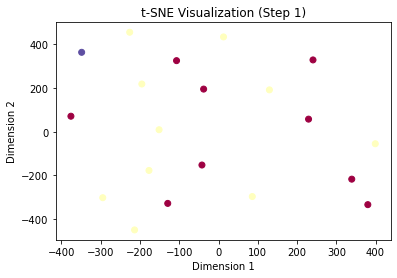

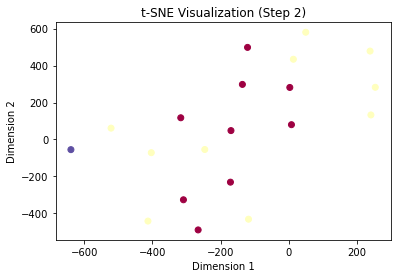

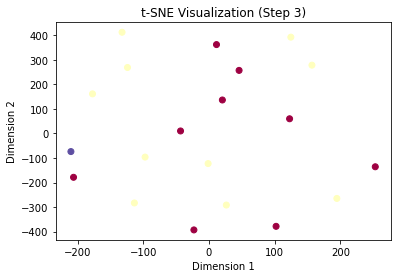

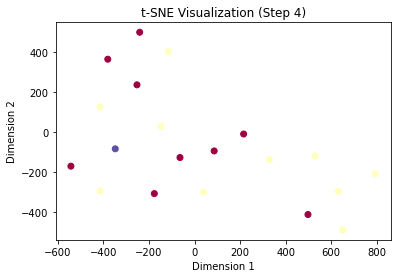

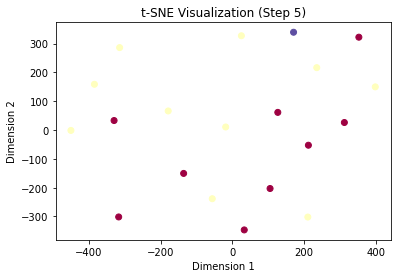

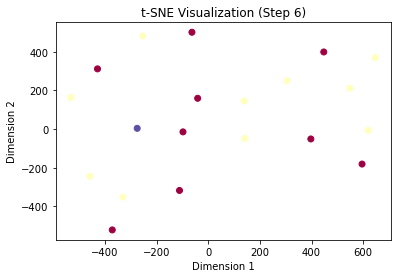

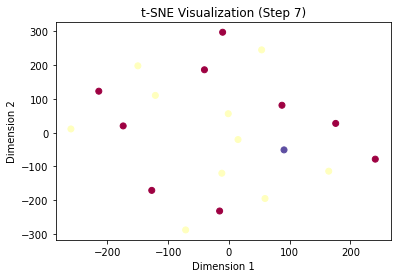

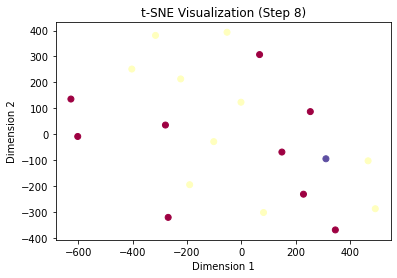

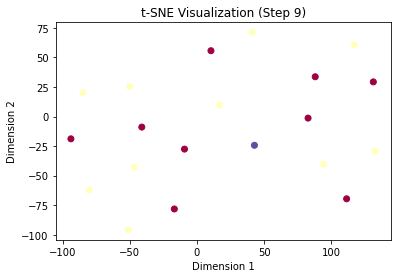

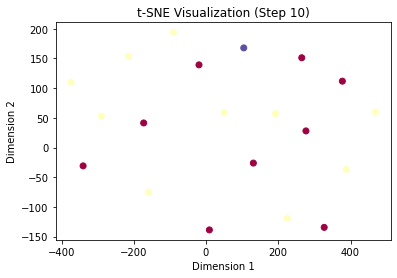

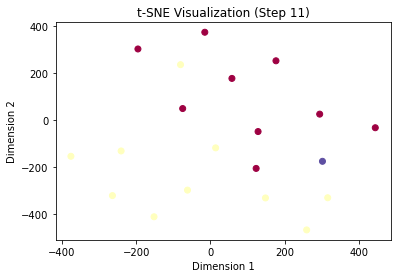

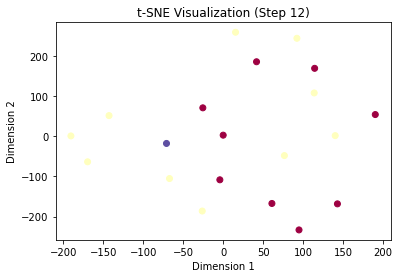

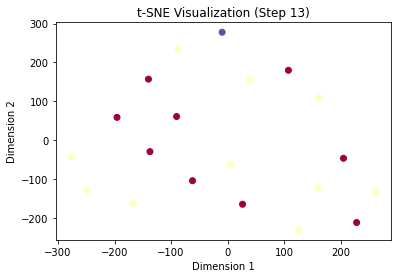

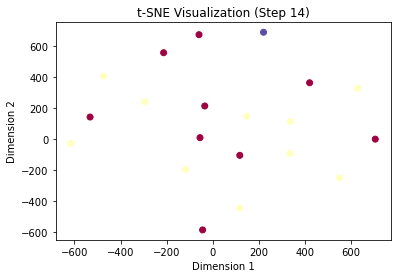

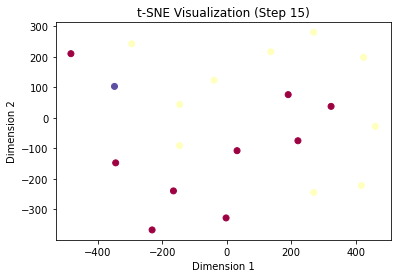

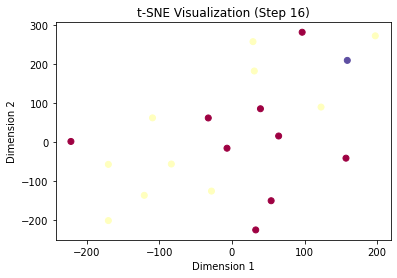

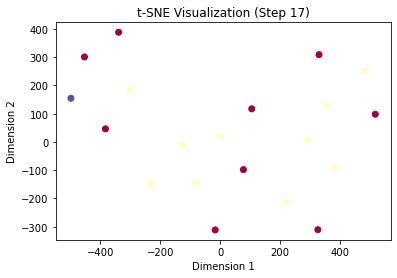

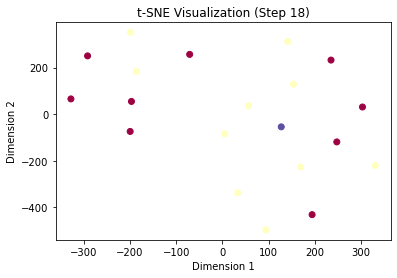

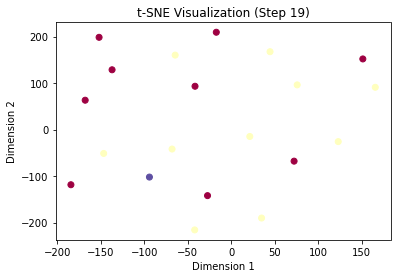

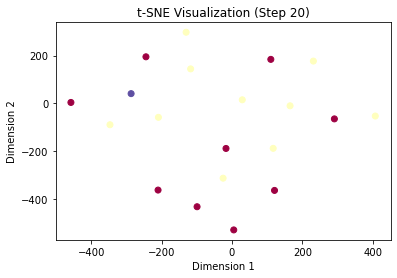

In [5]:
# Visualizing t-SNE results at each time step with colored clusters
for step, (tsne_result, step_labels) in enumerate(zip(tsne_results, all_labels)):
    plt.figure(figsize=(6, 4))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=step_labels, cmap=plt.cm.Spectral)
    plt.title(f't-SNE Visualization (Step {step + 1})')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()